# Doctor in the Cell

F. Fages, March 2020


# Diagnosis algorithm for comas
We want to implement with enzymatic reactions the following diagnosis algorithm for different forms of comas 

<img src="algo.png" alt="algo.png" style="width: 800px;"/>

# Boolean circuits
We will implement the following three Boolean circuits for detecting the different forms of comas in three vesicles that will react with patient's blood or urine. 

<img src="circuit.png" alt="circuit.png" style="width: 800px;"/>

# Catalog of enzymatic reactions
Here is a catalog of elementary enzymatic reactions given with kinetic rate constants 
### containing reactions with our inputs of interest:
* glucoseext
* acetoneext
* Lactateext
* ethanol ```EtOHext```
* nitric oxydes ```NO2ext, NO3ext```

### reactions producing outputs visible by color or fluorescence: 
* resorufin
* NADH
* ABTSOX
* DAFF

### and molecules that can be put in the initial state
* ABTS
* NADH
* NAD
* LO
* resazurin
* HRP
* AO
* HRP2
* POD
* ADH
* NR
* G_1DH
* O2
* DAF

In [1]:
load(catalog).

In [2]:
list_model.

MA(0.005) for glucoseext=>glucose.
MA(0.01) for acetoneext=>acetone.
MA(0.005) for Lactateext=>Lactate.
MA(0.01) for EtOHext=>EtOH.
MA(0.005) for NO3ext=>NO3.
MA(0.005) for NO2ext=>NO2.
MA(1.15157e-5) for HRP+H_2O_2=>CCia5.
MA(24) for CCia5=>HRP+H_2O_2.
MA(7.77313e-6) for CCia5+resazurin=>CCib5.
MA(1) for CCib5=>CCia5+resazurin.
MA(240) for CCib5=>HRP+resorufin.
MA(2.91492e-9) for HRP2+NADH=>CCf4.
MA(0.0009) for CCf4=>HRP2+NADH.
MA(0.009) for CCf4=>HRP2+NADN.
MA(5.82985e-8) for AO+isopropanol=>CCf3.
MA(15) for CCf3=>AO+isopropanol.
MA(150) for CCf3=>CCio3+H_2O_2.
MA(10000) for CCio3=>AO+HRP2.
MA(9.50049e-12) for ADH+NADH=>CCia2.
MA(0.033) for CCia2=>ADH+NADH.
MA(1.08824e-6) for CCia2+acetone=>CCib2.
MA(0.07) for CCib2=>CCia2+acetone.
MA(0.7) for CCib2=>CCfa2+NAD.
MA(0.33) for CCfa2=>ADH+isopropanol.
MA(1.8077e-6) for G_1DH+NAD=>CCia1.
MA(40) for CCia1=>G_1DH+NAD.
MA(9.71641e-9) for CCia1+glucose=>CCib1.
MA(20) for CCib1=>CCia1+glucose.
MA(200) for CCib1=>CCfa1+NADH.
MA(400) for CCfa1=>

### The graphs are not easily readable
You will need to browse the catalog
* with your favorite editor 
* or with some help on finding pathways with a Prolog goal below


In [3]:
clear_initial_state.
present({EtOHext, Lactateext, glucoseext, acetoneext, NO2ext, NO3ext}). % inputs
option(left_to_right: no). % top-down drawing with inputs at the top

In [4]:
draw_reactions.

In [5]:
reaction_graph. 
export_graph(catalog.svg).

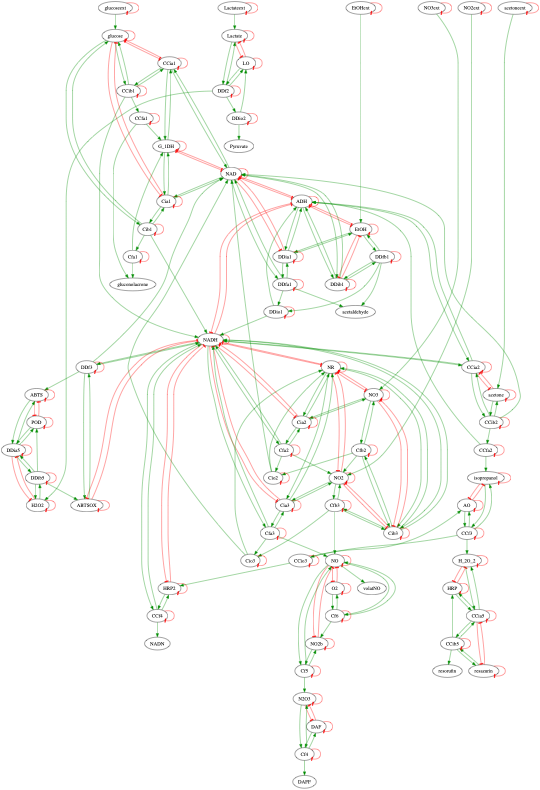

In [6]:
draw_influences.

In [7]:
influence_graph.
export_graph(catalog_influences.svg).

### Pathway search in Prolog

In [9]:
prolog('
    [minibiopsy], 
    load_bc("catalog.bc"), 
    forall(
        (
            reactants((pathway(glucoseext,G, GR), pathway(acetoneext, A, AR), reaction_schema(G+A => R), pathway(R, resorufin, RR)), Reactants),
            intersection([''ABTSOX'', ''Lactate'', ''NO2''], Reactants, [])
        ),
        (writeln(GR), writeln(AR), writeln(G+A=>R), writeln(RR), writeln(Reactants),nl)
    ).
').

          [(MA(0.005)for glucoseext=>glucose),(MA(9.71641e-9)for CCia1+glucose=>CCib1),(MA(200)for CCib1=>CCfa1+NADH)]
[(MA(0.01)for acetoneext=>acetone),(MA(1.08824e-6)for CCia2+acetone=>CCib2),(MA(0.7)for CCib2=>CCfa2+NAD),(MA(0.000119706)for DDia1+NAD=>DDfa1),(MA(308)for DDfa1=>DDio1+acetaldehyde),(MA(10000)for DDio1=>ADH+NADH),(MA(1.94328e-6)for Cia3+NADH=>Cfa3),(MA(2)for Cfa3=>Cio3+NO),(MA(10000)for Cio3=>NR+NAD)]
NADH+NR=>Cib3
[(MA(0.2)for Cib3=>NR+NADH),(MA(9.50049e-12)for ADH+NADH=>CCia2),(MA(1.08824e-6)for CCia2+acetone=>CCib2),(MA(0.7)for CCib2=>CCfa2+NAD),(MA(0.33)for CCfa2=>ADH+isopropanol),(MA(5.82985e-8)for AO+isopropanol=>CCf3),(MA(150)for CCf3=>CCio3+H_2O_2),(MA(1.15157e-5)for HRP+H_2O_2=>CCia5),(MA(7.77313e-6)for CCia5+resazurin=>CCib5),(MA(240)for CCib5=>HRP+resorufin)]
[ADH,AO,CCia1,CCia2,Cia3,DDia1,HRP,acetone,resazurin]

[(MA(0.005)for glucoseext=>glucose),(MA(9.71641e-9)for CCia1+glucose=>CCib1),(MA(200)for CCib1=>CCfa1+NADH),(MA(0.000204045)for Cia2+NADH=>Cfa2),(

### Conservation laws tell you someting about clusters of reactions
* they are structural invariants that guarantee that the total amount of some sets of species remains constant (i.e. remains equal to the sum of their initial concentrations)

In [8]:
search_conservations.

CCfa1+CCib1+Cfa1+Cib1+gluconolacrone+glucose+glucoseext
CCf4+CCia1+CCia2+CCib1+CCib2+Cfa2+Cfa3+Cfb2+Cfb3+Cia1+Cib1+Cib3+Cio2+Cio3+DDf3+DDfa1+DDfb1+DDib1+DDio1+NAD+NADH+NADN
CCfa1+CCia1+CCib1+Cfa1+Cia1+Cib1+G_1DH
ADH+CCfa2+CCia2+CCib2+DDfa1+DDfb1+DDia1+DDib1+DDio1
CCf3+CCf4+CCfa2+CCib2+CCio3+HRP2+acetone+acetoneext+isopropanol
CCf3+CCfa2+CCia5+CCib2+CCib5+H_2O_2+acetone+acetoneext+isopropanol+resorufin
Cfa2+Cfa3+Cfb2+Cfb3+Cia2+Cia3+Cib3+Cio2+Cio3+NR
ABTS+ABTSOX+DDf3+DDia5+DDib5
DDfa1+DDfb1+DDia1+EtOH+EtOHext+acetaldehyde
DDia5+DDib5+POD
AO+CCf3+CCio3
CCia5+CCib5+HRP
CCib5+resazurin+resorufin
Cf6+O2
Cf4+DAF+DAFF
DDf2+DDio2+LO
DDf2+DDio2+Lactate+Lactateext+Pyruvate
Cf6+Cfa2+Cfa3+Cfb2+Cfb3+Cia2+Cia3+NO+NO2+NO2b+NO2ext+NO3+NO3ext+volatNO+2*Cf4+2*Cf5+2*DAFF+2*N2O3
ABTSOX+CCfa1+CCia1+CCib1+CCib2+Cfa1+Cfa3+Cfb3+Cia1+Cia3+Cib1+Cio2+Cio3+DDf2+DDf3+DDfa1+DDfb1+DDib1+DDib5+H2O2+Lactate+Lactateext+NAD+NO2+NO2ext+acetaldehyde+acetone+acetoneext+gluconolacrone+2*Cfa2+2*Cfb2+2*Cia2+2*NO3+2*NO3ext
19 c

# Biochemical programs in synthetic vesicles

<img src="MSBcover-source.jpg" alt="MSBcover-source.jpg" style="width: 400px;"/> 

# Question 1) Design a vesicle to implement the first Boolean circuit 
* using molecular species from the catalog
* with inputs glucose and acetone
* and two visible outputs of your choice

### Basically you just have to determine the enzyme to put in the vesicle to implement the circuit

# Question 2)  Show the response for the whole truth table (4 states)

# Question 3) Implement the second Boolean circuit in another vesicle

# Question 4) Design the third vesicle

# Designing a vesicle for testing SARS-COV-2 ?
* SARS-COV-2 is a program of 15 genes encapsulated within a protein crown (a well-deserved crown for stopping the world!)
* Testing the presence of SARS-COV-2 in your nose mood is in principle possible with similar vesicles at low cost and fast response time (15mn)